In [1]:
from lrcb.bandits.multirep_finite import make_random_rep, fix_rank, hls_rank, rank, FiniteMultiBandit, derank
from lrcb.bandits.finite_linear_bandits import FiniteLinearBandit
from lrcb.algos.oful import oful
from lrcb.algos.lr_oful import select_oful
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lrcb.visualization.notebook_utils as nu

In [2]:
nc = 100
na = 20
dim = 20
seeds = [1, 2, 3, 4, 5]

In [3]:
r0 = make_random_rep(nc, na, dim)
hls_rank(r0)

20

In [4]:
reps = [derank(r0, i) for i in range(1, dim)]
reps.append(r0)

for r in reps:
    print('%d/%d' % (hls_rank(r), rank(r)))

1/20
2/20
3/20
4/20
5/20
6/20
7/20
8/20
9/20
10/20
11/20
12/20
13/20
14/20
15/20
16/20
17/20
18/20
19/20
20/20


In [5]:
iterations = 500
reg = 0.01
noise = 0.5
delta = 0.2
param_bound = math.sqrt(2)

problem = FiniteMultiBandit(nc, na, reps)

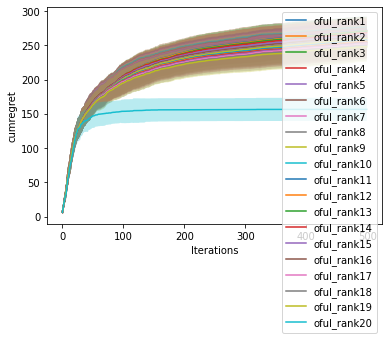

In [6]:
names = []
for i in range(len(reps)):
    problem.select_rep(i)
    name = 'oful_rank%d' % hls_rank(reps[i])
    names.append(name)
    for seed in seeds:
        oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname=name)

nu.compare('../logs', names, 'cumregret', seeds)

In [7]:
for seed in seeds:
    select_oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname='oful_select')

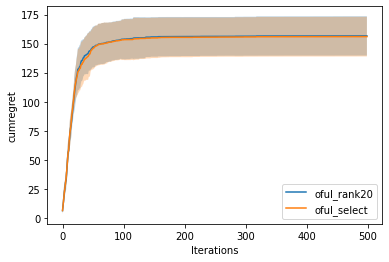

In [8]:
names = ['oful_rank%d' % dim, 'oful_select']
        
nu.compare('../logs', names, 'cumregret', seeds)

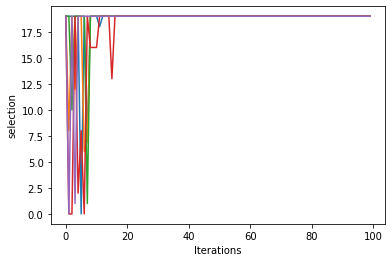

In [10]:
nu.plot_all('../logs', 'oful_select', 'selection', seeds, rows=100)